# Morphological Operators Tutorial

## CMSE 495 Capstone

----

## What are Morphological Operators?

In the context of image segmentation, **morphological operators** are mathematical operations that can help extract useful features from images, especially when shapes of objects are concerned.

These operations can be applied to image segmentation maps to refine the labeled regions on the map, and achieve desire accuracy.

### Examples of Common Morphological Operators

- **Dilation:** This operation is used to make segments bigger, adding pixels around the edges. It can be used to connect fragmented segments or to fill in small gaps.
- **Erosion:** This operation is used to make segments smaller, removing pixels around the boundaries of segments. Its main purpose is to separate overlapping segments and to remove small segments from the map. 
- **Opening:** This operation that is an erosion operation followed immediately by a dilation operation. It is used to take advantage of the removing small objects capabilities of erosion while preserving shapes and sizes of larger objects. 
- **Closing:** This operation is the inverse of opening, a dilation operation followed immediately by an erosion operation. Its purpose is to fill in small holes or gaps of segments in an image while not changing the overall shape of the object.

---

## Demo

In [32]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from skimage import morphology

If you are interested in sci-kit image's morphology module's documentation, check it out here(https://scikit-image.org/docs/0.10.x/api/skimage.morphology.html)

### Sample image

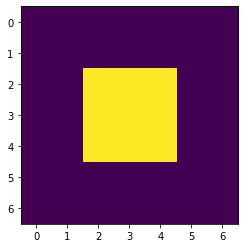

In [3]:
image = np.array([[0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 1, 1, 1, 0, 0],
                  [0, 0, 1, 1, 1, 0, 0],
                  [0, 0, 1, 1, 1, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0]], dtype=np.uint8)
plt.imshow(image);

These are examples of matrices that are used to preform operations: a diamond and a square.

In [4]:
# matrices
sq = morphology.square(width=3)
dia = morphology.diamond(radius=1)
print(sq)
print(dia)

[[1 1 1]
 [1 1 1]
 [1 1 1]]
[[0 1 0]
 [1 1 1]
 [0 1 0]]


---
### Erosion:
This operation is used to make segments smaller, this is done by setting a pixel to the minimum over all nearby pixels and removing pixels around the boundaries of segments. Its main purpose is to separate overlapping segments and to remove small segments from the map. 

<Figure size 432x288 with 0 Axes>

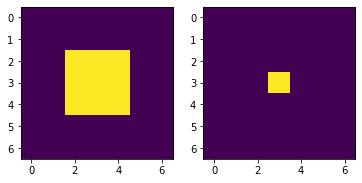

In [5]:
# erosion with square matrix
plt.figure()
f, axarr = plt.subplots(1,2) 

axarr[0].imshow(image) # original image
axarr[1].imshow(morphology.erosion(image, sq)) #eroded image

<Figure size 432x288 with 0 Axes>

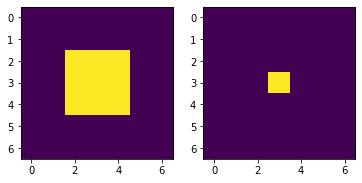

In [6]:
# erosion with diamond matrix
plt.figure()
f, axarr = plt.subplots(1,2) 

axarr[0].imshow(image) # original image
axarr[1].imshow(morphology.erosion(image, dia)) # dilated image

---
### Dilation:
This operation is used to make segments bigger, this is done by setting a pixel to the maximum over all nearby pixels and adding pixels around the edges. It can be used to connect fragmented segments or to fill in small gaps.

<Figure size 432x288 with 0 Axes>

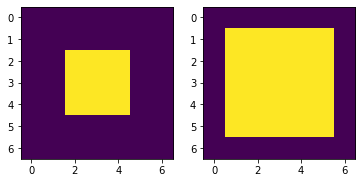

In [7]:
# dilation with square matrix
plt.figure()
f, axarr = plt.subplots(1,2) 

axarr[0].imshow(image) # original image
axarr[1].imshow(morphology.dilation(image, sq)) # dilated image

<Figure size 432x288 with 0 Axes>

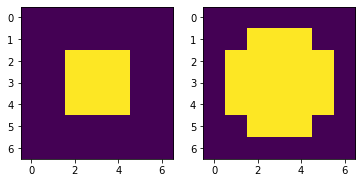

In [8]:
# dilation with diagonal matrix
plt.figure()
f, axarr = plt.subplots(1,2) 

axarr[0].imshow(image) # original image
axarr[1].imshow(morphology.dilation(image, dia)) # dilated image

---
### Opening and Closing:
- **Opening:** This operation that is an erosion operation followed immediately by a dilation operation. It is used to take advantage of the removing small objects capabilities of erosion while preserving shapes and sizes of larger objects. 
- **Closing:** This operation is the inverse of opening, a dilation operation followed immediately by an erosion operation. Its purpose is to fill in small holes or gaps of segments in an image while not changing the overall shape of the object.

---

Let's generate an image with a hole in it to showcase these properties.

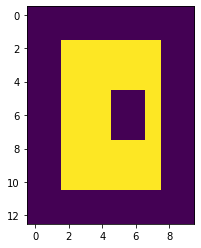

In [9]:
hole = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
                  [0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
                  [0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
                  [0, 0, 1, 1, 1, 0, 0, 1, 0, 0],
                  [0, 0, 1, 1, 1, 0, 0, 1, 0, 0],
                  [0, 0, 1, 1, 1, 0, 0, 1, 0, 0],
                  [0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
                  [0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
                  [0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], np.uint8)
plt.imshow(hole);

### Opening:

<Figure size 432x288 with 0 Axes>

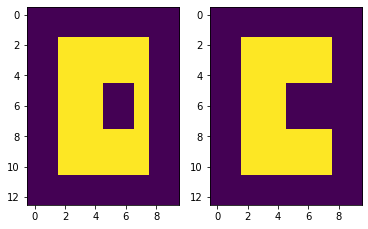

In [10]:
# opening with square matrix
plt.figure()
f, axarr = plt.subplots(1,2) 

axarr[0].imshow(hole) # original image
axarr[1].imshow(morphology.opening(hole, sq)) # dilated image

<Figure size 432x288 with 0 Axes>

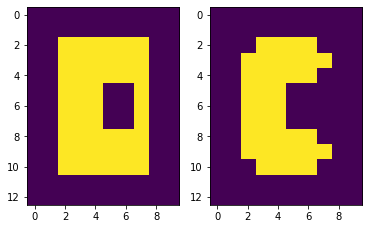

In [11]:
# opening with diagonal matrix
plt.figure()
f, axarr = plt.subplots(1,2) 

axarr[0].imshow(hole) # original image
axarr[1].imshow(morphology.opening(hole, dia)) # dilated image

### Closing: 

<Figure size 432x288 with 0 Axes>

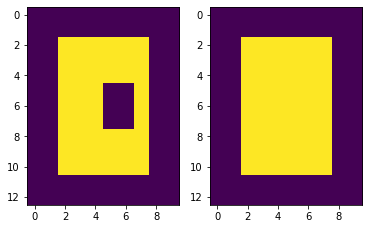

In [12]:
# closing with square matrix
plt.figure()
f, axarr = plt.subplots(1,2) 

axarr[0].imshow(hole) # original image
axarr[1].imshow(morphology.closing(hole, sq)) # dilated image

<Figure size 432x288 with 0 Axes>

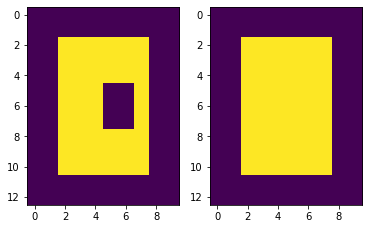

In [13]:
# closing with diagonal matrix
plt.figure()
f, axarr = plt.subplots(1,2) 

axarr[0].imshow(hole) # original image
axarr[1].imshow(morphology.closing(hole, dia)) # dilated image

---

Now that we have an idea on how these operations work on simple shapes, we can begin to apply these ideas to a more complex image segmentation map.

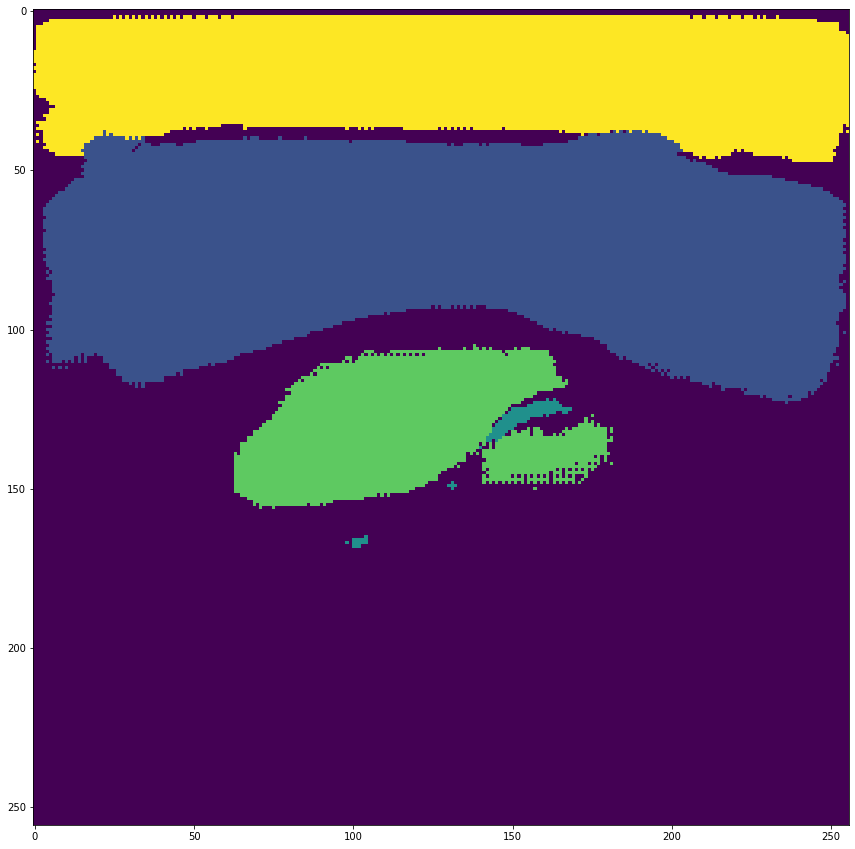

In [31]:
# importing the example outputs (segmentation maps)
example = np.load("output_example.npy")

plt.figure(figsize = (15,15))
plt.imshow(example) # image1


Helpful function from skimage include `label` and `regionprops`. These functions allow you to split your segmentation map into sepearate blobs (via `label`) and then get specific properties about the blobs like area, symmetry, and others (via `regionprops` on the labeled image).

In [34]:
#imports
from skimage.measure import label, regionprops

First, let's generate a labeled image using `label`.

<Figure size 432x288 with 0 Axes>

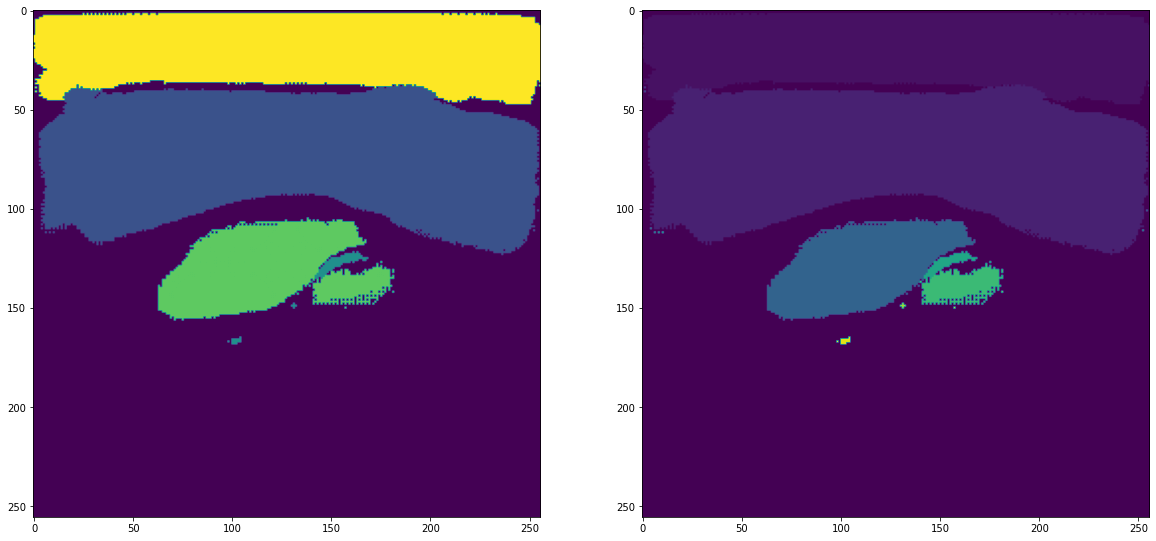

In [36]:
labeled_image = label(example)

plt.figure()
f, axarr = plt.subplots(1,2, figsize = (20,10)) 

axarr[0].imshow(example) # original image
axarr[1].imshow(labeled_image) # dilated image


As you can see above, each of the three separate blob areas now has its own label, and the labeled image is now ready to be fed into `regionprops`.

In [38]:
blobs = regionprops(labeled_image)

By running regionprops on our labeled image, we get a list of blob objects that we can run specific commands on.

In [43]:
# number of distinct labels/blobs in the image
len(blobs)

22

In [44]:
# area of each blob
for blob in blobs:
    print(blob.area)

9597
15803
1
1
1
1
3346
1
1
1
1
1
121
1
556
2
1
1
5
1
14
1


In [49]:
# this command lets you see all the other properties you can get from a blob. Very helpful!
dir(blobs[0])

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_cache',
 '_cache_active',
 '_intensity_image',
 '_intensity_image_double',
 '_label_image',
 '_ndim',
 '_slice',
 'area',
 'bbox',
 'bbox_area',
 'centroid',
 'convex_area',
 'convex_image',
 'coords',
 'eccentricity',
 'equivalent_diameter',
 'euler_number',
 'extent',
 'filled_area',
 'filled_image',
 'image',
 'inertia_tensor',
 'inertia_tensor_eigvals',
 'intensity_image',
 'label',
 'local_centroid',
 'major_axis_length',
 'max_intensity',
 'mean_intensity',
 'min_intensity',
 'minor_axis_length',
 'moments',
 'moments_central',
 'moments_hu',
 'moments_normalized',
 'orientation',
 'pe